In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
from google.colab import files
import pickle
import os
from scipy import stats
from scipy.stats import zscore

!pip install missingno
import missingno as msno

!pip install fancyimpute
import fancyimpute

!pip install --upgrade autoviz
from autoviz.AutoViz_Class import AutoViz_Class

warnings.filterwarnings("ignore")
%matplotlib inline

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 3.8 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=4d00f8873d7740bc426cf6c1da28ae800ed42bdc2cf70f02494e2e94cb34baa8
  Stored in directory: /root/.cache/pip/wheels/df/20/91/e4850b9a31cf660c1bc95515d3bcbc8010e869e5de6d5baf07
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11331 sha256=dfbb4ec5be24b4c4cf4a70080f47bde5b7d1c74ef9c901c75438ee637406f349
  Stored in directory: /root/.cache/pip/wheels/89/11/61/aa5a3167bfff49218cd043a73a83034b9eadd858b0059521be
Successfully built fancyimpute knnimpute
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# BG_BLACK = "\033[40m"
# BG_RED = "\033[41m"
# BG_GREEN = "\033[42m"
# BG_YELLOW = "\033[43m"
# BG_BLUE = "\033[44m"
# BG_MAGENTA = "\033[45m"
# BG_CYAN = "\033[46m"
# BG_WHITE = "\033[47m"
# BG_DARK_GRAY = "\033[100m"
# BG_BRIGHT_RED = "\033[101m"
# BG_BRIGHT_GREEN = "\033[102m"
# BG_BRIGHT_YELLOW = "\033[103m"
# BG_BRIGHT_BLUE = "\033[104m"
# BG_BRIGHT_MAGENTA = "\033[105m"
# BG_BRIGHT_CYAN = "\033[106m"
# BG_WHITE = "\033[107m"
# RESET = "\033[0m" # Reset all formatting

In [ ]:
np.random.seed(31071967)

In [ ]:
download_pickels = True

In [ ]:
import os, pathlib, sys
!mkdir -p pickles
pickle_file = '/content/pickles/load_default_clean.pkl'

if not os.path.exists(pickle_file):
# Upload file
  uploaded = files.upload()

# Read pickle into DataFrame
df = pd.read_pickle(pickle_file)

df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month
1,545583,2500,2500,2500,36 months,13.98,85,4.0,RENT,20004,Not Verified,other,MI,19.86,0,5,7,0,981,21.3,10,3075,3075,2500,575,91,0,2010,7,2005,8,2013,7,2016,6
2,532101,5000,5000,5000,36 months,15.95,176,4.0,RENT,59000,Not Verified,debt_consolidation,NY,19.57,0,1,7,0,18773,99.9,15,2949,2949,1909,874,176,1,2010,6,1994,4,2011,11,2012,3
3,877788,7000,7000,7000,36 months,9.91,226,10.0,MORTGAGE,53796,Not Verified,other,TX,10.80,3,3,7,0,3269,47.2,20,8082,8082,7000,1082,1550,0,2011,9,1998,3,2014,3,2014,3
4,875406,2000,2000,2000,36 months,5.42,60,10.0,RENT,30000,Not Verified,debt_consolidation,NY,3.60,0,0,7,0,0,0.0,15,2162,2162,2000,162,53,0,2011,9,1975,1,2014,2,2016,6
5,506439,3600,3600,3600,36 months,10.25,117,10.0,MORTGAGE,675048,Not Verified,other,AL,1.55,0,4,8,0,0,0.0,25,4206,4206,3600,606,147,0,2010,4,1998,4,2013,5,2016,6


In [ ]:
df.describe()

In [ ]:
df_with_Orig_nulls = df.copy() # keep for visualizations

In [ ]:
unique_id_cols = ['id']
#1
dup_cols       = []
#0
large_cat_cols = []
#0
small_cat_cols = ['term','emp_length','home_ownership','verification_status','purpose','addr_state']
#6
cont_cols      = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc',
                  'revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','last_pymnt_amnt','pub_rec']#,'months_between_earliest_to_issue']
#19
date_cols      = ['issue_d_year','issue_d_month','earliest_cr_line_year','earliest_cr_line_month','last_pymnt_d_year','last_pymnt_d_month','last_credit_pull_d_year','last_credit_pull_d_month']
#8
cat_cols       = large_cat_cols + small_cat_cols
y_col          = ['repay_fail']
#1
MERGE_ID_COL   = 'id' # if we'll need to merge pickels later
x_cols             = cont_cols + date_cols


**Imputate original NULLS**

In [ ]:
df.isnull().sum()

,0
id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
emp_length,993
home_ownership,0
annual_inc,1


For a very small or nearly zero amount of NULL values, intuitive imputation can be applied.

In [ ]:
#for 3 NULL in last_credit_pull_d_year,last_credit_pull_d_month - the loan issue date
df['last_credit_pull_d_year'] = df['last_credit_pull_d_year'].fillna(df['issue_d_year'])
df['last_credit_pull_d_month'] = df['last_credit_pull_d_month'].fillna(df['issue_d_month'])

In [ ]:
#few rows fillna with median
df['annual_inc'] = df['annual_inc'].fillna(df['annual_inc'].median())

In [ ]:
display(df.describe())

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month
count,3.847800e+04,38478.0,38478.0,38478.0,38478.000000,38478.0,38478.0,38478.000000,38478.0,38478.0,38478.0,38478.0,38475.0,38419.000000,38478.0,38478.0,38478.0,38478.0,38478.0,38478.0,38478.000000,38478.0,38478.0,38478.0,38478.0,38407.0,38407.0,38478.0,38478.0
mean,6.650325e+05,11095.015983,10832.137845,10150.404985,12.162307,323.175945,68996.833151,13.376215,0.151931,1.08397,9.343209,0.057903,14290.237687,49.110081,22.109049,11981.008472,11274.811581,9646.661599,2232.827382,2614.511591,0.151463,2010.233042,7.131816,1996.5841,6.878424,2012.703856,6.467285,2014.240995,6.148345
std,2.191854e+05,7405.296268,7146.733214,7127.932429,3.709485,209.082568,64475.450867,6.729713,0.507598,1.534824,4.497881,0.24571,21941.541465,28.353097,11.588253,9006.416265,8946.160564,7051.749973,2570.1864,4392.002927,0.358504,0.962635,3.416248,6.832742,3.536742,1.611596,3.423701,1.864642,2.936946
min,5.473400e+04,500.0,500.0,0.0,5.420000,16.0,1896.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,2007.0,1.0,1946.0,1.0,2007.0,1.0,2007.0,1.0
25%,4.983722e+05,5200.0,5100.0,4950.0,9.620000,166.0,40000.0,8.200000,0.0,0.0,6.0,0.0,3640.0,25.700000,13.0,5463.0,4812.25,4400.0,658.0,212.0,0.000000,2010.0,4.0,1993.0,4.0,2012.0,3.0,2013.0,4.0
50%,6.443430e+05,9750.0,9600.0,8497.5,11.990000,278.0,58650.0,13.485000,0.0,1.0,9.0,0.0,8840.0,49.600000,20.0,9673.5,8954.0,8000.0,1335.0,526.0,0.000000,2011.0,7.0,1998.0,7.0,2013.0,6.0,2015.0,6.0
75%,8.265722e+05,15000.0,15000.0,14000.0,14.720000,429.0,82000.0,18.690000,0.0,2.0,12.0,0.0,17266.0,72.700000,29.0,16402.75,15487.0,13317.5,2795.0,3170.0,0.000000,2011.0,10.0,2001.0,10.0,2014.0,9.0,2016.0,8.0
max,1.077430e+06,35000.0,35000.0,35000.0,24.110000,1305.0,6000000.0,29.990000,11.0,33.0,47.0,5.0,1207359.0,119.000000,90.0,58564.0,58564.0,35000.0,23611.0,36115.0,1.000000,2011.0,12.0,2008.0,12.0,2016.0,12.0,2016.0,12.0


In [ ]:

mask = (
    df['revol_bal' ].isna() | df['revol_bal' ].astype(str).str.strip().eq('') |
    df['revol_util'].isna() | df['revol_util'].astype(str).str.strip().eq('')
)

missing_rows = df.loc[mask, ['revol_bal', 'revol_util']]
print(missing_rows)

# כמה שורות נמצאו
print('rows with missing revol_bal or revol_util:', missing_rows.shape[0])


       revol_bal  revol_util
1123         0        NaN   
3069         0        NaN   
3540         0        NaN   
3646         0        NaN   
3668         0        NaN   
3886         0        NaN   
4260         0        NaN   
5131         0        NaN   
6114         0        NaN   
6626         0        NaN   
7512         0        NaN   
7663         0        NaN   
8193         0        NaN   
8206         0        NaN   
8212         0        NaN   
8364         0        NaN   
8485         0        NaN   
9613         0        NaN   
11700        0        NaN   
11984        0        NaN   
12335    49238        NaN   
12370        0        NaN   
13128        0        NaN   
13662        0        NaN   
15356        0        NaN   
15650        0        NaN   
15684        0        NaN   
17202        0        NaN   
17356        0        NaN   
18491        0        NaN   
19712        0        NaN   
20010        0        NaN   
20942        0        NaN   
21064        0

In [ ]:
#because most of the REVOL_UTIL NaN have REVOL_BAL 0 ' ichek the REVAL_UTIL not NaN of REVOL_BAL = 0 - most of them are 0 so fill NanN of revol_util by 0 where Revoal_bal = 0

In [ ]:
import pandas as pd

# המרה למספרים (אם יש מחרוזות), בלי הסרת אחוזים
ru_num = pd.to_numeric(df['revol_util'], errors='coerce')

# מסיכה: revol_bal == 0 ו-revol_util לא חסר
mask = (df['revol_bal'] == 0) & (~ru_num.isna())

vals = ru_num[mask]

less_1     = (vals < 1).sum()
greater_1  = (vals >= 1).sum()

print(f"<1: {less_1}")
print(f">= 1: {greater_1}")
# אופציונלי:
# print(f"= 1: {(vals == 5).sum()}")
# print(f"Total considered: {vals.shape[0]}")



<1: 850
>= 1: 69


In [ ]:
print(df.isnull().sum()[df.isnull().any()])

emp_length            993
revol_bal               3
revol_util             59
last_pymnt_d_year      71
last_pymnt_d_month     71
dtype: int64


In [ ]:
#for so few Nan put the median
df[['revol_bal', 'revol_util']] = df[['revol_bal', 'revol_util']].fillna(
    df[['revol_bal', 'revol_util']].median(numeric_only=True)
)
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])

In [ ]:
print(df.isnull().sum()[df.isnull().any()])

last_pymnt_d_year     71
last_pymnt_d_month    71
dtype: int64


In [ ]:
#for last_payment_date - add the mean month between issue_date and payment_date to the issue_date in the line and cakculate the last_pymnt_d_year	last_pymnt_d_month with NAN

In [ ]:
import pandas as pd
import numpy as np

# נוודא טיפוסים נומריים עם NA חוקי
for c in ['issue_d_year','issue_d_month','last_pymnt_d_year','last_pymnt_d_month']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce').astype('Int64')

# 1) בניית issue_d ו-last_pymnt_d מ-(year, month), יום=01
def build_dt(year_col, month_col):
    # נבנה מחרוזת 'YYYY-MM-01' רק כששנה וחודש קיימים
    y = df[year_col].astype('Int64')
    m = df[month_col].astype('Int64')
    s = (
        y.astype('string').str.zfill(4) + '-' +
        m.astype('string').str.zfill(2) + '-01'
    )
    # אם חסר שנה/חודש התוצאה תהיה 'NaT'
    s = s.mask(y.isna() | m.isna())
    return pd.to_datetime(s, errors='coerce', format='%Y-%m-%d')

df['issue_d']      = build_dt('issue_d_year', 'issue_d_month')
df['last_pymnt_d'] = build_dt('last_pymnt_d_year', 'last_pymnt_d_month')  # שימי לב לשם העמודה

# 2) חישוב הפרש חודשי ממוצע (אפשר גם median כדי להיות עמיד לחריגות)
m_valid = df['issue_d'].notna() & df['last_pymnt_d'].notna()
months_diff = (
    (df.loc[m_valid, 'last_pymnt_d'].dt.year  - df.loc[m_valid, 'issue_d'].dt.year) * 12 +
    (df.loc[m_valid, 'last_pymnt_d'].dt.month - df.loc[m_valid, 'issue_d'].dt.month)
)

avg_months = int(round(months_diff.mean())) if len(months_diff) else 0
# לחלופין: avg_months = int(round(months_diff.median()))
avg_months = max(avg_months, 0)  # להבטיח לא שלילי
print(f"Average months between issue_d and last_pymnt_d: {avg_months}")

# 3) השלמת שנה/חודש חסרים של last_pymnt_d ע"י issue_d + avg_months
m_need = (df['last_pymnt_d_year'].isna() | df['last_pymnt_d_month'].isna()) & df['issue_d'].notna()

imputed_dates = df.loc[m_need, 'issue_d'] + pd.DateOffset(months=avg_months)

df.loc[m_need, 'last_pymnt_d_year']  = imputed_dates.dt.year.astype('Int64')
df.loc[m_need, 'last_pymnt_d_month'] = imputed_dates.dt.month.astype('Int64')

# (אופציונלי) לשמור גם את התאריך המשוער עצמו
# df.loc[m_need, 'last_pymnt_d_imputed'] = imputed_dates

print("Rows filled:", m_need.sum())


Average months between issue_d and last_pymnt_d: 29
Rows filled: 71


In [ ]:
# כל השורות שבהן last_pymnt_d_month הוא NaN / חסר
missing_month = df[df['last_pymnt_d'].isna()]

print(missing_month.shape)      # כמה שורות חסרות
missing_month.head(10)          # להציג את הראשונות


(71, 37)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,issue_d,last_pymnt_d
276,409248,4600,4600,4600,36 months,15.68,161,10.0,RENT,75000,Not Verified,other,IL,8.00,0,4,21,1,6909,29.2,53,0,0,0,0,0,1,2009,5,1989,8,2011,10,2016,6,2009-05-01,NaT
2116,520008,3600,3600,3600,60 months,15.70,87,5.0,RENT,38004,Verified,debt_consolidation,NY,22.89,0,2,7,0,2697,59.9,17,162,162,0,0,0,1,2010,5,2004,4,2012,10,2010,11,2010-05-01,NaT
2685,620448,2500,2500,2500,36 months,9.62,80,1.0,RENT,19968,Verified,debt_consolidation,TX,2.94,0,3,4,0,1523,38.1,7,112,112,0,0,0,1,2010,11,2006,10,2013,4,2011,5,2010-11-01,NaT
2739,480401,10000,10000,3975,36 months,13.85,341,10.0,RENT,140000,Not Verified,credit_card,IL,7.25,0,3,23,0,47134,50.7,41,450,179,0,0,0,1,2010,2,1999,12,2012,7,2010,7,2010-02-01,NaT
2763,758813,5000,5000,4175,36 months,13.99,171,1.0,RENT,50000,Not Verified,small_business,VA,8.69,0,1,4,1,4814,89.0,17,283,236,0,0,0,1,2011,5,2004,3,2013,10,2011,11,2011-05-01,NaT
3287,593837,1000,1000,1000,36 months,16.32,35,3.0,RENT,14400,Not Verified,debt_consolidation,MD,5.33,0,0,5,0,1875,76.8,11,45,45,0,0,0,1,2010,10,2007,5,2013,3,2011,3,2010-10-01,NaT
4095,454682,6000,6000,5950,36 months,14.61,207,0.0,RENT,30000,Not Verified,debt_consolidation,NY,16.20,0,2,4,0,16626,91.9,6,0,0,0,0,0,1,2009,11,2004,12,2012,4,2016,6,2009-11-01,NaT
4173,772782,12325,12325,12075,60 months,11.49,271,2.0,RENT,42000,Not Verified,house,PA,17.03,0,1,11,0,29254,33.6,18,12325,12075,0,0,0,1,2011,6,1998,9,2013,11,2016,6,2011-06-01,NaT
4260,772732,2000,2000,1900,36 months,18.39,73,1.0,RENT,24000,Not Verified,other,AZ,22.60,0,3,3,0,0,49.6,16,90,90,0,0,0,1,2011,6,2006,5,2013,11,2011,11,2011-06-01,NaT
4355,496276,20000,20000,17375,36 months,10.25,648,0.0,RENT,64000,Not Verified,debt_consolidation,NJ,6.06,0,0,17,0,6587,18.3,21,899,781,0,0,0,1,2010,4,2001,9,2012,9,2016,6,2010-04-01,NaT


In [ ]:
df.drop(columns=['last_pymnt_d'], inplace=True, errors='ignore')

In [ ]:
print(df.isnull().sum()[df.isnull().any()])

Series([], dtype: int64)


**Outliers detection**

In [ ]:
# keep a copy for before&after plots
df_with_outliers = df.copy()

In [ ]:
import pandas as pd, numpy as np
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler

num = df.select_dtypes(include=np.number)
summary = pd.DataFrame({
    "n": num.notna().sum(),
    "%null": num.isna().mean().round(3),
    "mean": num.mean(),
    "std": num.std(),
    "min": num.min(),
    "p1": num.quantile(0.01),
    "p99": num.quantile(0.99),
    "max": num.max(),
    "skew": num.apply(skew, nan_policy='omit'),
    "kurt": num.apply(kurtosis, nan_policy='omit')
}).sort_values("skew", ascending=False)

corr_top = num.corr().abs()
high_corr_pairs = [(i,j,corr_top.loc[i,j]) for i in corr_top.columns for j in corr_top.columns
                   if i<j and corr_top.loc[i,j]>0.9]

print(summary.head(10))
print("High-corr pairs (>0.9):", high_corr_pairs[:10])


                   n    %null      mean           std        min     p1     \
annual_inc       38478   0.0   68996.833151  64475.450867  1896.0  14400.0   
revol_bal        38478   0.0    14289.81275  21940.738848     0.0      0.0   
delinq_2yrs      38478   0.0       0.151931      0.507598     0.0      0.0   
pub_rec          38478   0.0       0.057903       0.24571     0.0      0.0   
inq_last_6mths   38478   0.0        1.08397      1.534824     0.0      0.0   
last_pymnt_amnt  38478   0.0    2614.511591   4392.002927     0.0      6.0   
total_rec_int    38478   0.0    2232.827382     2570.1864     0.0     53.0   
repay_fail       38478   0.0       0.151463      0.358504     0.0      0.0   
total_pymnt_inv  38478   0.0   11274.811581   8946.160564     0.0   145.08   
total_pymnt      38478   0.0   11981.008472   9006.416265     0.0    690.0   

                    p99       max       skew        kurt      
annual_inc       240000.0  6000000.0  30.555427  2264.651607  
revol_bal      

In [ ]:


# 1) לוג רק למשתנים עם סקיו קשוח
heavy_tail = [c for c in ['annual_inc','revol_bal','total_pymnt','total_pymnt_inv',
                          'last_pymnt_amnt','total_rec_int'] if c in df.columns]
df[heavy_tail] = df[heavy_tail].clip(lower=0).apply(np.log1p)

# 2) MAD per-column → NaN
def replace_outliers_mad(s, mad_thr=3.5):
    med = s.median()
    mad = np.median(np.abs(s - med))
    if mad == 0 or np.isnan(mad):  # אין פיזור – לא נוגעים
        return s
    modified_z = 0.6745 * (s - med) / mad
    return s.mask(np.abs(modified_z) > mad_thr)

mad_thr = 3.5
df[cont_cols] = df[cont_cols].apply(lambda col: replace_outliers_mad(col, mad_thr))


In [ ]:
print(df.isnull().sum()[df.isnull().any()])

loan_amnt          2385
funded_amnt        2327
funded_amnt_inv    2357
int_rate           1924
installment        2262
annual_inc         2068
dti                1924
delinq_2yrs        1924
inq_last_6mths     2271
open_acc           2093
pub_rec            1924
revol_bal          3330
revol_util         1924
total_acc          2059
total_pymnt        2066
total_pymnt_inv    2389
total_rec_prncp    2555
total_rec_int      2036
last_pymnt_amnt    1924
dtype: int64


In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

cols = cols_to_check_for_outliers

# 0) בדיקת NaN ואינסופים
# print(df[cols].isna().sum().sum(), "NaNs in input")  # אופציונלי

# 1) עותק מעובד לאימון LOF (לא נוגעים במקור בשלב זה)
imp = SimpleImputer(strategy='median')
scaler = StandardScaler()

X_imp = imp.fit_transform(df[cols])       # מחליף NaN בערכי חציון (רק לעותק)
X_scaled = scaler.fit_transform(X_imp)    # חשוב ל-LOF/DBSCAN

# 2) LOF
lof = LocalOutlierFactor(n_neighbors=25, contamination=0.05)
row_is_outlier = (lof.fit_predict(X_scaled) == -1)

print(f"LOF found {row_is_outlier.sum()} outlier rows")

# 3) החלת התוצאה על ה-DF המקורי: הפיכת הערכים באותן שורות ל-NaN
df.loc[row_is_outlier, cols] = np.nan


LOF found 1924 outlier rows


In [ ]:
print(df.isnull().sum()[df.isnull().any()])

loan_amnt          2385
funded_amnt        2327
funded_amnt_inv    2357
int_rate           1924
installment        2262
annual_inc         2068
dti                1924
delinq_2yrs        1924
inq_last_6mths     2271
open_acc           2093
pub_rec            1924
revol_bal          3330
revol_util         1924
total_acc          2059
total_pymnt        2066
total_pymnt_inv    2389
total_rec_prncp    2555
total_rec_int      2036
last_pymnt_amnt    1924
dtype: int64


In [ ]:
df_with_nulls = df.copy() # keep for visualizations

the next only for documentation of other options

In [ ]:
# cols_to_check_for_outliers = cont_cols
# outliers_alg = '' # options: 'Z_SCORE' IQR' 'MAD' 'ISO' 'LOF' 'DBSCAN'
# outliers_detection_threshold = 3

In [ ]:
# # keep a copy for before&after plots
# df_with_outliers = df.copy()

In [ ]:
# if outliers_alg == 'IQR':

#   multiplier = 1.5
#   total_outliers_repleced = 0

#   for col in cols_to_check_for_outliers:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - multiplier * IQR
#     upper = Q3 + multiplier * IQR
#     mask = (df[col] < lower) | (df[col] > upper)

#     # Replace outliers
#     df.loc[mask, col] = np.nan
#     total_outliers_repleced += mask.sum()

#     print(f"{col}: replaced {mask.sum()} outliers")

#   print(f"\nA total of {total_outliers_repleced} cells replaced with NaN")

In [ ]:
# if outliers_alg == 'MAD':

#   total_outliers_repleced = 0

#   for col in cols_to_check_for_outliers:

#   #identify outliers using MAD
#     median = df[col].median()
#     mad = np.median(np.abs(df[col] - median))
#     modified_z = 0.6745 * (df[col] - median) / mad

#     mad_threshold = outliers_detection_threshold
#     mask = np.abs(modified_z) > mad_threshold
#     while mask.sum() > 300:
#       mad_threshold += 0.1
#       mask = np.abs(modified_z) > mad_threshold

#   # replace with NaN
#     df.loc[mask, col] = np.nan
#     total_outliers_repleced += mask.sum()
#     print(f"{col}: replaced {mask.sum()} outliers, using a modified_z threshold of {mad_threshold}")

#   print(f"\nA total of {total_outliers_repleced} cells replaced with NaN")

In [ ]:
# if outliers_alg == 'Z_SCORE':

#   # compute z-scores
#   Z_score = np.abs(stats.zscore(df[cols_to_check_for_outliers], nan_policy='omit'))

#   # create a mask of True where Z > 3
#   mask = Z_score > outliers_detection_threshold

#   # count replaced cells per column
#   replaced_counts = mask.sum(axis=0)

#   # pretty print with column names
#   print(f"{replaced_counts.sum()} cells replaced with NaN (Z > 3):")
#   for col, count in zip(cols_to_check_for_outliers, replaced_counts):
#       print(f"{col}: {count}")

#   # actually replace with NaN
#   df[cols_to_check_for_outliers] = df[cols_to_check_for_outliers].mask(mask)

In [ ]:
# if outliers_alg == 'ISO':

#   from sklearn.ensemble import IsolationForest
#   import pandas as pd

#   # Fit Isolation Forest
#   iso = IsolationForest(contamination=0.05, random_state=42)
#   df['outlier_iso'] = iso.fit_predict(df[cols_to_check_for_outliers])

#   # Label outliers
#   outliers_iso = df[df['outlier_iso'] == -1]
#   print(f"IsolationForest found {len(outliers_iso)} outliers")

#   # Replace outlier values with NaN
#   for col in cols_to_check_for_outliers:
#     mask = df['outlier_iso'] == -1 # -1 if 'iso' in outlier_col or 'lof' in outlier_col else df[outlier_col] == 1
#     df.loc[mask, col] = np.nan

#   df.drop('outlier_iso', axis=1, inplace=True)

In [ ]:
# if outliers_alg == 'LOF':

#   from sklearn.neighbors import LocalOutlierFactor

#   num_cols = df.select_dtypes(include='number').columns

#   lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
#   df['outlier_lof'] = lof.fit_predict(df[cols_to_check_for_outliers])

#   # Label outliers
#   outliers_lof = df[df['outlier_lof'] == -1]
#   print(f"LOF found {len(outliers_lof)} outliers")

#    # Replace outlier values with NaN
#   for col in cols_to_check_for_outliers:
#     mask = df['outlier_lof'] == -1 # -1 if 'iso' in outlier_col or 'lof' in outlier_col else df[outlier_col] == 1
#     df.loc[mask, col] = np.nan

#   df.drop('outlier_lof', axis=1, inplace=True)

In [ ]:
# if outliers_alg == 'DBSCAN':

#   from sklearn.cluster import DBSCAN
#   from sklearn.preprocessing import StandardScaler

#   # Scale features (important for DBSCAN)
#   X_scaled = StandardScaler().fit_transform(df[cols_to_check_for_outliers])

#   db = DBSCAN(eps=1.5, min_samples=10)
#   labels = db.fit_predict(X_scaled)

#   df['outlier_dbscan'] = (labels == -1).astype(int)

#   outliers_dbscan = df[df['outlier_dbscan'] == 1]
#   print(f"DBSCAN found {len(outliers_dbscan)} outliers")

#   # Replace outlier values with NaN
#   for col in cols_to_check_for_outliers:
#     mask = df['outlier_dbscan'] == 1 #-1 if 'iso' in outlier_col or 'lof' in outlier_col else df[outlier_col] == 1
#     df.loc[mask, col] = np.nan

#   df.drop('outlier_dbscan', axis=1, inplace=True)

**# Imputate outlier nulls**

In [ ]:
df.isnull().sum()

,0
id,0
loan_amnt,2385
funded_amnt,2327
funded_amnt_inv,2357
term,0
int_rate,1924
installment,2262
emp_length,0
home_ownership,0
annual_inc,2068


In [ ]:
imputer = None
outliers_replacement = 'NaN'
imputer_alg = 'MICE' # options: 'MICE', 'KNN'

In [ ]:
df_with_nulls = df.copy() # keep for visualizations

In [ ]:
if imputer_alg == 'MICE':

  from sklearn.experimental import enable_iterative_imputer  # noqa
  from fancyimpute import IterativeImputer  # MICE-like
  imputer = IterativeImputer(max_iter=15)
  df[x_cols] = imputer.fit_transform(df[x_cols])

In [ ]:
if imputer_alg == 'KNN':

  from fancyimpute import KNN
  imputer = KNN(k=5)
  df[cols_to_check_for_outliers] = imputer.fit_transform(df[cols_to_check_for_outliers])

In [ ]:
# 3. Find the cells that were NaN before
missing_mask = df_with_nulls.isna()

# 4. Compare old (NaN) vs new (imputed) values
for col in x_cols:
    replaced_values = df.loc[missing_mask[col], col]
    if not replaced_values.empty:
        print(f"Column: {col} impute {len(replaced_values)+1} NaN cells with values")
        #for idx, new_val in replaced_values.items():
        #    print(f"Row {idx}: filled with {new_val:.3f}")

Column: loan_amnt impute 2386 NaN cells with values
Column: funded_amnt impute 2328 NaN cells with values
Column: funded_amnt_inv impute 2358 NaN cells with values
Column: int_rate impute 1925 NaN cells with values
Column: installment impute 2263 NaN cells with values
Column: annual_inc impute 2069 NaN cells with values
Column: dti impute 1925 NaN cells with values
Column: delinq_2yrs impute 1925 NaN cells with values
Column: inq_last_6mths impute 2272 NaN cells with values
Column: open_acc impute 2094 NaN cells with values
Column: revol_bal impute 3331 NaN cells with values
Column: revol_util impute 1925 NaN cells with values
Column: total_acc impute 2060 NaN cells with values
Column: total_pymnt impute 2067 NaN cells with values
Column: total_pymnt_inv impute 2390 NaN cells with values
Column: total_rec_prncp impute 2556 NaN cells with values
Column: total_rec_int impute 2037 NaN cells with values
Column: last_pymnt_amnt impute 1925 NaN cells with values
Column: pub_rec impute 1925 N

***Visualize the result of cleansing***

In [ ]:
df.isna().sum()

,0
id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
emp_length,0
home_ownership,0
annual_inc,0


**Using ANOVA to validate distribution of each col along the cleansing process**

In [ ]:
results = []

for col in cols_to_check_for_outliers:

    groups = [
        df_with_outliers[col].dropna(),
        df_with_nulls[col].dropna(),
        df[col].dropna()
    ]

    # Check data validity before running ANOVA
    group_lengths = [len(g) for g in groups]
    unique_counts = [g.nunique() for g in groups]

    # Detect common problems
    if any(l < 2 for l in group_lengths):
        reason = "Too few samples in at least one group"
        f_stat, p_val = np.nan, np.nan
    elif all(u == 1 for u in unique_counts):
        reason = "All groups constant (no variance)"
        f_stat, p_val = np.nan, np.nan
    else:
        try:
            f_stat, p_val = stats.f_oneway(*groups)
            reason = (
                "Valid test" if np.isfinite(p_val)
                else "Invalid numeric result (possibly zero variance)"
            )
        except Exception as e:
            f_stat, p_val, reason = np.nan, np.nan, f"Error: {e}"

    results.append({
        "column along the process": col,
        "F_statistic": f_stat,
        "p_value": p_val,
        "significant": (p_val < 0.05) if np.isfinite(p_val) else False,
        "reason": reason
    })

anova_diagnostic = pd.DataFrame(results)
anova_diagnostic = anova_diagnostic.sort_values("p_value", na_position="last")

pd.set_option("display.float_format", "{:.4f}".format)
display(anova_diagnostic)

,column along the process,F_statistic,p_value,significant,reason
5,annual_inc,42866.0640,0.0000,True,Valid test
14,total_pymnt_inv,59124.3970,0.0000,True,Valid test
13,total_pymnt,66163.1759,0.0000,True,Valid test
10,revol_bal,15595.7211,0.0000,True,Valid test
17,last_pymnt_amnt,13227.5272,0.0000,True,Valid test
16,total_rec_int,28089.7573,0.0000,True,Valid test
8,inq_last_6mths,76.8674,0.0000,True,Valid test
0,loan_amnt,47.8516,0.0000,True,Valid test
15,total_rec_prncp,41.0279,0.0000,True,Valid test
1,funded_amnt,37.1317,0.0000,True,Valid test


**And Scatter plots**

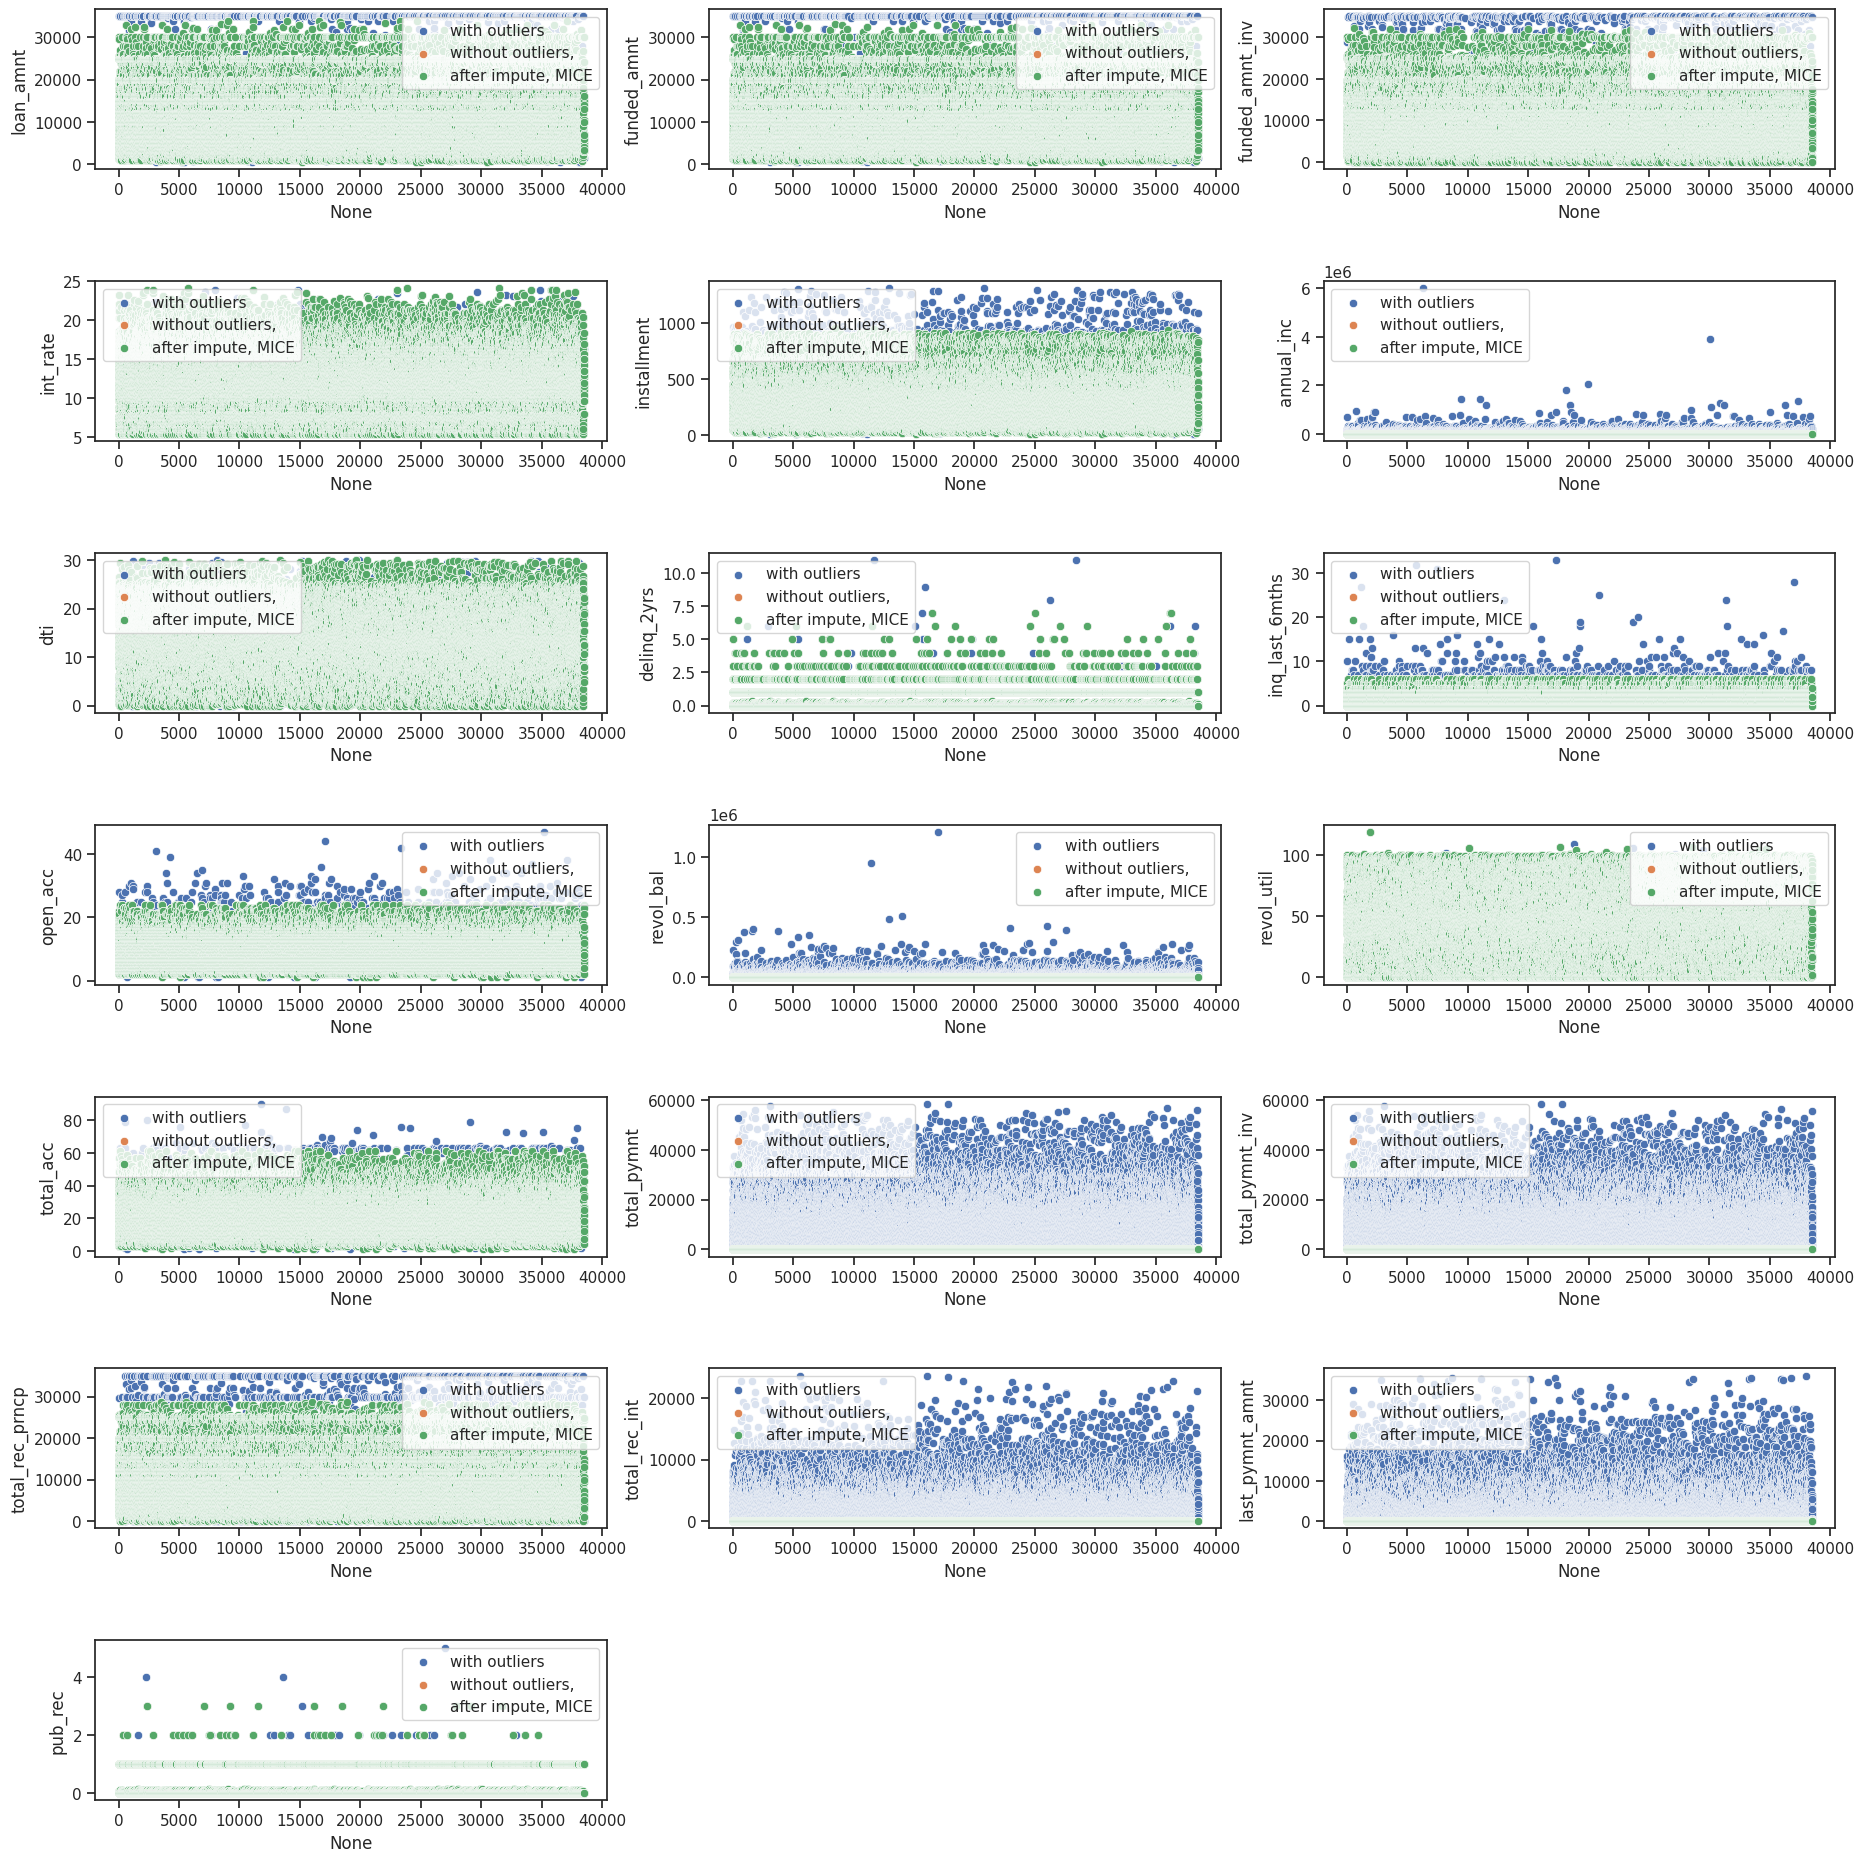

In [ ]:
## scatterplots
plt.figure(figsize=(20,200))
for i, col in enumerate(df[cols_to_check_for_outliers], start=1):
  ax = plt.subplot(60, 3, i)
  sb.scatterplot(x=df_with_outliers.index, y=df_with_outliers[col], ax=ax, label='with outliers')
  sb.scatterplot(x=df_with_nulls.index, y=df_with_nulls[col], ax=ax, label=f"without outliers, {outliers_alg}")
  sb.scatterplot(x=df.index, y=df[col], ax=ax, label=f"after impute, {imputer_alg}")
  plt.subplots_adjust(hspace = 0.7)

plt.show()

Much better now - blue dots out✌

In [ ]:
from google.colab import files
import os

with open("./pickles/load_default_datacleansing_clean.pkl", 'wb') as f:
  pickle.dump(df, f)
  f.close()

# Get the list of files in the pickles directory
pickle_files = [f for f in os.listdir("./pickles/") if os.path.isfile(os.path.join("./pickles/", f))]

# Download each file individually
for file_name in pickle_files:
  files.download(os.path.join("./pickles/", file_name))

"pickles downloaded locally on your PC"

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'pickles downloaded locally on your PC'